![](https://raw.githubusercontent.com/rafneta/CienciaDatosPythonCIDE/master/imagenes/banner.png)

```{contents}
:depth: 4
```

# Comprensión, lambdas

Las _comprensiones de listas_ ofrecen una manera concisa de crear listas. Sus usos comunes son para hacer nuevas listas donde cada elemento es el resultado de algunas operaciones aplicadas a cada miembro de otra secuencia o iterable, o para crear un segmento de la secuencia de esos elementos para satisfacer una condición determinada

```
[expresión for <vars> in <sucuencia> ]
[expresión for <vars> in <sucuencia> if <condición> ]

```


Las palabra reservada `lambda` se utiliza para crear funciones anónimas. Las funciones Lambda pueden ser usadas en cualquier lugar donde sea requerido un objeto de tipo función. Están sintácticamente restringidas a una sola expresión.


```
 lambda <parámetros>:  <expresión> 
```


In [113]:
cua = []
for x in range(10):
    cua.append(x ** 2)
print(cua)

cua = [x ** 2 for x in range(10)]
print(cua)


cua = list(map(lambda x: x ** 2, range(10)))
print(cua)



[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [114]:
[(x, y) for x in [1,2,3] for y in [3,1,4] if x != y]

[(1, 3), (1, 4), (2, 3), (2, 1), (2, 4), (3, 1), (3, 4)]

## Ejemplo:  Ecuaciones en diferencias deterministicas

Se tiene la siguiente función en tiempo discreto ($t\in \mathbb{Z}$)

$$y[t] = y_t = (0.5)^t$$

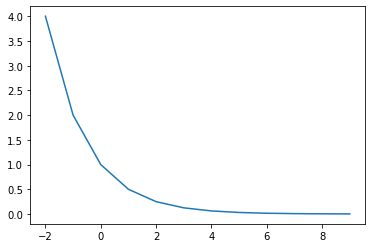

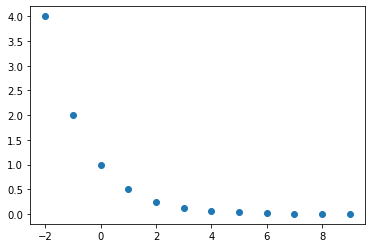

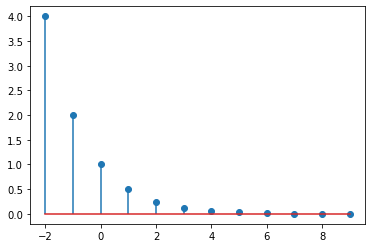

In [11]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(-2, 10)
y_t = (0.5) ** t
plt.plot(t, y_t)
plt.show()
plt.plot(t,y_t, 'o')
plt.show()
plt.stem(t, y_t)
plt.show()

Entonces la gráfica de $y_t$, $y_{t+1}$, $y_{t-1}$


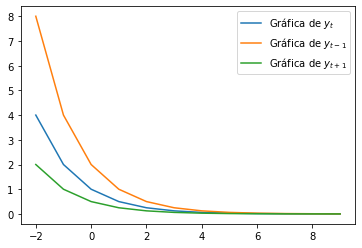

In [19]:
y_tme1 = (0.5) ** (t - 1)
y_tma1 = (0.5) ** (t + 1)
plt.plot(t,y_t, label = 'Gráfica de $y_t$')
plt.plot(t,y_tme1, label = 'Gráfica de $y_{t-1}$')
plt.plot(t,y_tma1, label = 'Gráfica de $y_{t+1}$')
plt.legend()
plt.show()


Las ecuaciones en diferecnias deterministicas son relaciones donde la incognita es una función de un conjunto discreto donde todos los términos involucrados son funciones deterministicas. La relación expresa una igualdad entre funciones y sus desplazamientos horizontales.

En particular las ecuaciones en diferencias lineales con coeficientes constantes tienen a siguiente forma:  


$$a_ky[t]+a_{k-1}y[t-1]+\ldots+a_0y[t-k]=b_mx[t]+b_{m-1}x[t-1]+\ldots+b_0x[t-m]\;\;\mbox{(formato de atraso)}$$

$$a_ky[t+k]+a_{k-1}y[t+k-1]+\ldots+a_0y[t]=b_mx[t+m]+b_{m-1}x[t+m-1]+\ldots+b_0x[t]\;\;\mbox{(formato de adelanto)}$$

Estas relaciones surgen al modelar fénomenos donde la variable de interés es $y[t]=y_t$ y donde $x[t]=x_t$ es una función conocida que está relacionada con el fénomeno modelado. Si bien existen técnicas análiticas para resolver estos problemas (por ejemplo: transformada $\mathcal{Z}$). Nos centraremos en la implementación computacional de la solución númerica.

Las traslaciones podrian verse como _las derivadas_ es decir de acuerdo al cantidad de tralaciones clasificaremos a estas ecuaciones, por ejmplo, si la tralación más grande presente es de dos unidades, diremos que tenemos una ecuación en diferencias de orden dos. Al igual que la ecuaciones diferencias, necesitamos condiciones inciales, tantas como el orden de la ecuación . Como estamos modelando un fénomeno, normalmente asignamos el momento de observación como $t_0 = 0$. Ambos formatos son equivalentes, pero las condiciones iniciales difieren:

Para el formato de atraso: $y[-1],y[-2],\ldots,y[-k]$

Para el formato de adelato: $y[0],y[1],\ldots,y[k-1]$

Por otro lado se supone que la función $x_t$ interactua a partir de $t = 0$, que es el momento en el que se comienza  observar el fénomeno. 

Lo dicho anteriormente es correcto, pero en algunas aplicaciones donde es necesario utilizar este tipo de ecuaciones podrían existor algunas variantes del como se piensa el modelado, como por ejemplo en **series de tiempo**, en donde también dependiendo de la literatura, puede haber variación en como se plantea la interpretación de la ecuación en diferencias. 

Tomemos el sogueinte ejemplo:

$$y_t  - 5y_{t-1} + 6y_{t-2} = 3x_{t-1} + 5x_{t-2},\;\;x_t=(0.5)^t\;\;t\geq 0,\;\;y_{-1}=\frac{11}{6}, y_{-2}=\frac{37}{36} $$

$$y_{t+2} -5y_{t+1} + 6y_{t} = 3x_{t+1}+5x_t,\;\;x_t=(0.5)^t\;\;t\geq 0,\;\;y_{1}=7, y_{0}=3 $$


Con técnicas análiticas el resultado 

$$y_t = \frac{18}{5}(3)^t - \frac{7}{3}(2)^t + \frac{26}{15}(0.5)^t,\;\;t\geq 0$$


### Ejemplo: Módulo Seaborn

[Seaborn](https://seaborn.pydata.org/index.html) es una biblioteca de visualización de datos de Python basada en matplotlib. Proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos e informativos. La recomendació sería apoyarse de l [galeria](https://seaborn.pydata.org/examples/index.html)

Instalamos `seaborn` donde las sigeuintes dependencias se instalarán (de no estar instaladas) numpy, scipy, pandas, matplotlib


```
conda install seaborn

```



[3.0, 7.0, 23.499999999999996, 78.75, 254.375]
[1.0277777777777777, 1.8333333333333333, 3.0, 7.0, 23.5, 78.75, 254.375]


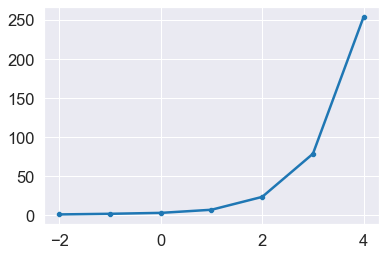

In [85]:
y = [37/36, 11/6]

y2 =  5 * y[1] - 6 * y[0] # t = 0
y.append(y2)
y3 = 3 * (0.5) ** (0)  + 5 * y[2] - 6 * y[1] # t = 1
y.append(y3)


for t  in range(2, 5):
    y.append(3 * (0.5) ** (t - 1) + 5 * (0.5) ** (t - 2) + 5 * y[t + 1] - 6 * y[t])
    
    
import seaborn as sns    
    
f = lambda t:  (18 / 5) * 3 ** t - (7 / 3) * 2 ** t + (26 / 15) * 0.5 ** t

#  def f(t):
#    return (18 / 5) * 3 ** t - (7 / 3) * 2 ** t + (26 / 15) * 0.5 ** t


print(list(map(f, range(0, 5))))
print(y)


sns.set_style("darkgrid")

sns.lineplot(x = range(-2, 5), y = y)
sns.scatterplot(x=range(-2, 5), y = y)
plt.show()

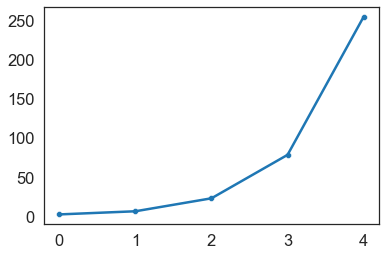

[3, 7, 23.5, 78.75, 254.375]


In [122]:
tiempo = list(range(2 ,5))
y = [3, 7]

for t  in tiempo:
    y.append(3 * (0.5) ** (t-1) + 5 * (0.5) ** (t-2) + 5 * y[t - 1] - 6 * y[t-2])


sns.lineplot(x = [0,1] + tiempo, y = y)
sns.scatterplot(x = [0,1] + tiempo, y = y)
plt.show()

print(y)   


$$a_2y[t+2]+a_{1}y[t-1]+a_0y[t]=b_2x[t+2]+b_{1}x[t+1]+b_0x[t]\;\;\mbox{(formato de adelanto)}$$

por ejemplo

$$y_{t+2} -5y_{t+1} + 6y_{t} = 3x_{t+1}+5x_t,\;\;x_t=(0.5)^t\;\;t\geq 0,\;\;y_{1}=7, y_{0}=3 $$

[  3.      7.     23.5    78.75  254.375]


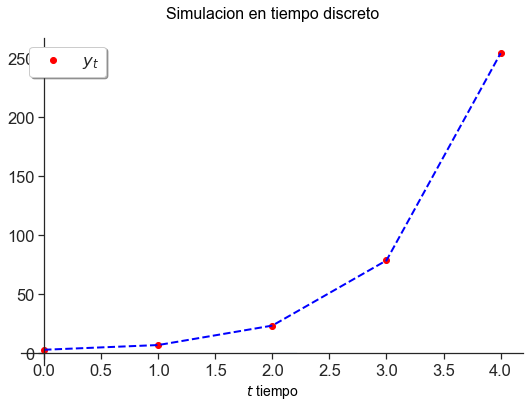

In [115]:
import numpy as np

def simulacion(a, b, y0, x, n):
    """
    a = [a0,a1,a2]
    b = [b0,b1,b2]
    y0 = [y[0], y[1]]
    x = función 
    n = valor final de simulacion
    """
    
    y = np.empty(n) 
    y[0] = y0[0]
    y[1] = y0[1]
    
    for t in range(0, n - 2):
        y[t + 2] = (b[2] / a[2]) * x(t + 2) + (b[1] / a[2]) * x(t + 1) + (b[0] /a[2] ) * x(t) \
        -  (a[1] / a[2]) * y[t + 1] - (a[0] / a[2]) * y[t]
    return y


y = simulacion([6 , -5, 1],[5, 3, 0],[3, 7], lambda t: (0.5) ** t, 5)
print(y)

sns.set_style("white")

def grafica(y, guarda = False):
    
    fig, ax = plt.subplots(figsize = (9, 6))
    for spine in ['left', 'bottom']:
        ax.spines[spine].set_position(('data', 0))
    for spine in ['right', 'top']:
        ax.spines[spine].set_color('none')

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    #ax.grid()
    #ax.axhline(0.7391,0.05,0.95, label = "Estado estacionario", color = 'brown')

    ax.plot(y, 'or', label = '$y_{t}$')
    ax.plot(y, '--b', lw = 2)
    ax.set_xlabel('$t$ tiempo', fontsize = 14, color = 'k')
    ax.set_title("Simulacion en tiempo discreto", fontsize = 16, color = 'k', pad = 20)
    
    ax.axhline(0, 0.5, 0.55, lw = 0.1)

    
    ax.legend(loc = 'best', shadow = True, fancybox = True)

    
    if guarda:
        plt.savefig("graficasc.png")
        plt.savefig("graficasc.svg")
        plt.savefig("graficasc.pdf")
   
    
    plt.show()

grafica(y)



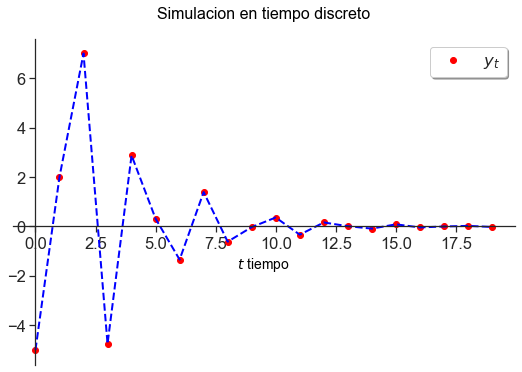

In [116]:
grafica(simulacion([0.5 , 1, 1], [5, 3, 0],[-5, 2], lambda t: (0.5) ** t, 20))

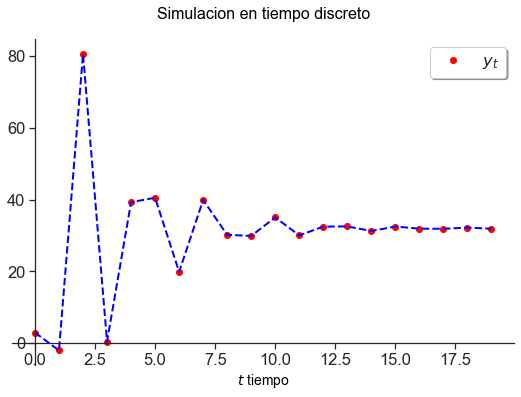

In [117]:
grafica(simulacion([0.5 , 1, 1], [5, 3 , 0], [3, -2], lambda t: 10, 20))

## Problema: Implementar una función para simular ecuaciones en diferencias de orden $k$

Pedir: la estructura (a,b), la expresión de $x$, las $k$ condiciones iniciales, el tiempo de simulación $n$

Regresa: La evalaución de la simulación

Imprime: La grafica de la simulación 

**Ayuda:** Modificiar el programa anterior incluyendo un ciclo anidado para las sumas correspondientes 




## Apéndice


Para Python, [PEP 8](https://www.python.org/dev/peps/pep-0008/) se erigió como la **guía de estilo** a la que más proyectos adhirieron; promueve un estilo de codificación fácil de leer y visualmente agradable. Aquí están extraídos los puntos más importantes:

- Usar sangrías de 4 espacios, no tabuladores.

- Recortar las líneas para que no superen los 79 caracteres.

- Usar líneas en blanco para separar funciones y clases, y bloques grandes de código dentro de funciones.

- Cuando sea posible, poner comentarios en una sola línea.

- Usar docstrings.

- Usar espacios alrededor de operadores y luego de las comas, pero no directamente dentro de paréntesis: a = f(1, 2) + g(3, 4).

- Nombrar las clases y funciones consistentemente; la convención es usar NotacionCamello para clases y minusculas_con_guiones_bajos para funciones y métodos. 

- Siempre usa self como el nombre 

- No uses codificaciones estrafalarias si esperas usar el código en entornos internacionales. El default de Python, UTF-8, o incluso ASCII plano funcionan bien en la mayoría de los casos.

- No uses caracteres no-ASCII en los identificadores si hay incluso una pequeñísima chance de que gente que hable otro idioma tenga que leer o mantener el código.


## Referencias

- [Paradigmas](https://www.infor.uva.es/~cvaca/asigs/docpar/intro.pdf)
- [Paradigmas Stanford](https://see.stanford.edu/Course/CS107/198)
